# Accuracy of Attributes

In [309]:
import os.path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
%matplotlib inline 

### Focus: Fowards & Scoring

In [310]:
RQ3_1 = pd.read_csv(('../../data/analysis/RQ3_1.csv'))
RQ3_1 = RQ3_1.drop('Unnamed: 0', 1)
RQ3_1 = RQ3_1.iloc[1:]

In [311]:
RQ3_1.head(5)

,Players,club,league,overall,age,Position,sho,crossing,finishing,heading_accuracy,short_passing,volleys,composure,preferred_foot,work_rate_att,weak_foot,Attacking Attributes,Total Apps,Total Goals,Average Goals/Game
1,Adam Hlousek,Legia Warszawa,Polish Ekstraklasa,71,28,Forward,59,68,54,66,69,58,65,Left,High,2,63.0,57.0,3.0,0.052632
2,Adam Le Fondre,Bolton Wanderers,English Championship,68,30,Forward,70,56,74,61,62,70,72,Right,High,3,64.6,34.0,12.0,0.352941
3,Adam Szalai,TSG 1899 Hoffenheim,German Bundesliga,75,29,Forward,74,49,74,83,72,68,75,Right,Medium,3,69.2,121.0,32.0,0.264463
4,Adama Diakhaby,AS Monaco,French Ligue 1,72,20,Forward,69,68,73,70,74,61,65,Left,High,2,69.2,25.0,4.0,0.160000
5,Adama Diomande,Hull City,English Championship,69,27,Forward,67,45,68,66,53,64,61,Right,Medium,3,59.2,22.0,2.0,0.090909


In [312]:
shooting = RQ3_1.groupby(['sho']).mean()['Average Goals/Game']
crossing = RQ3_1.groupby(['crossing']).mean()['Average Goals/Game']
finishing = RQ3_1.groupby(['finishing']).mean()['Average Goals/Game']
heading_accuracy = RQ3_1.groupby(['heading_accuracy']).mean()['Average Goals/Game']
short_passing = RQ3_1.groupby(['short_passing']).mean()['Average Goals/Game']
volleys = RQ3_1.groupby(['volleys']).mean()['Average Goals/Game']

In [313]:
shooting_corr = shooting.corr(RQ3_1['Average Goals/Game']).round(5).astype(str) 
crossing_corr = crossing.corr(RQ3_1['Average Goals/Game']).round(5).astype(str) 
finishing_corr = finishing.corr(RQ3_1['Average Goals/Game']).round(5).astype(str) 
heading_accuracy_corr = heading_accuracy.corr(RQ3_1['Average Goals/Game']).round(5).astype(str) 
short_passing_corr = short_passing.corr(RQ3_1['Average Goals/Game']).round(5).astype(str) 
volleys_corr = volleys.corr(RQ3_1['Average Goals/Game']).round(5).astype(str) 

In [314]:
att_attributes = pd.DataFrame(columns = ['shooting','crossing','finishing','heading_accuracy','short_passing','volleys'])
att_attributes.set_value('Average Goals/Game','shooting',shooting_corr)
att_attributes.set_value('Average Goals/Game','crossing',crossing_corr)
att_attributes.set_value('Average Goals/Game','finishing',finishing_corr)
att_attributes.set_value('Average Goals/Game','heading_accuracy',heading_accuracy_corr)
att_attributes.set_value('Average Goals/Game','short_passing',short_passing_corr)
att_attributes.set_value('Average Goals/Game','volleys',volleys_corr)

,shooting,crossing,finishing,heading_accuracy,short_passing,volleys
Average Goals/Game,0.17382,0.01506,0.02639,0.22297,0.24672,0.0804


In [315]:
shooting = shooting.to_frame().reset_index()
crossing = crossing.to_frame().reset_index()
finishing = finishing.to_frame().reset_index()
heading_accuracy = heading_accuracy.to_frame().reset_index()
short_passing = short_passing.to_frame().reset_index()
volleys = volleys.to_frame().reset_index()

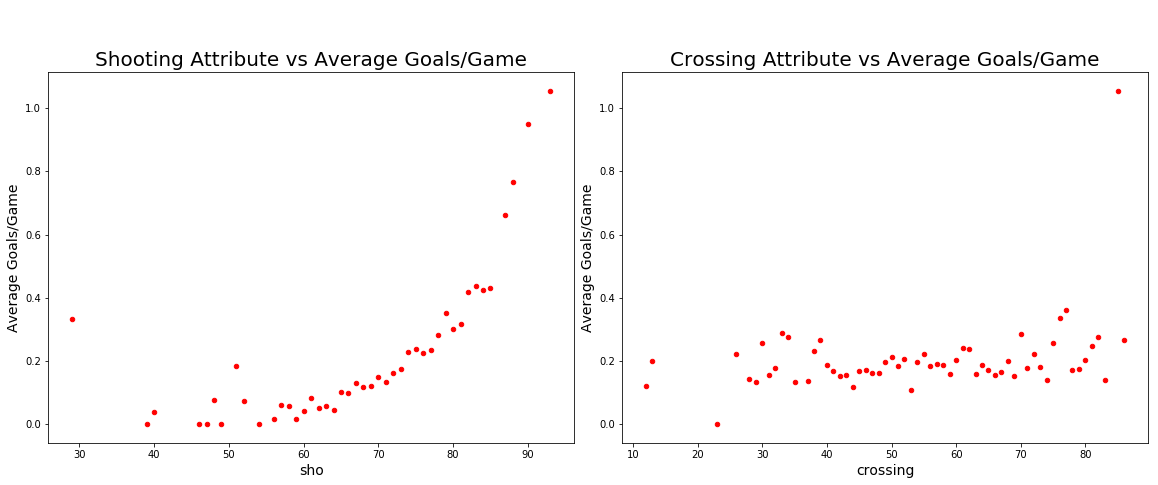

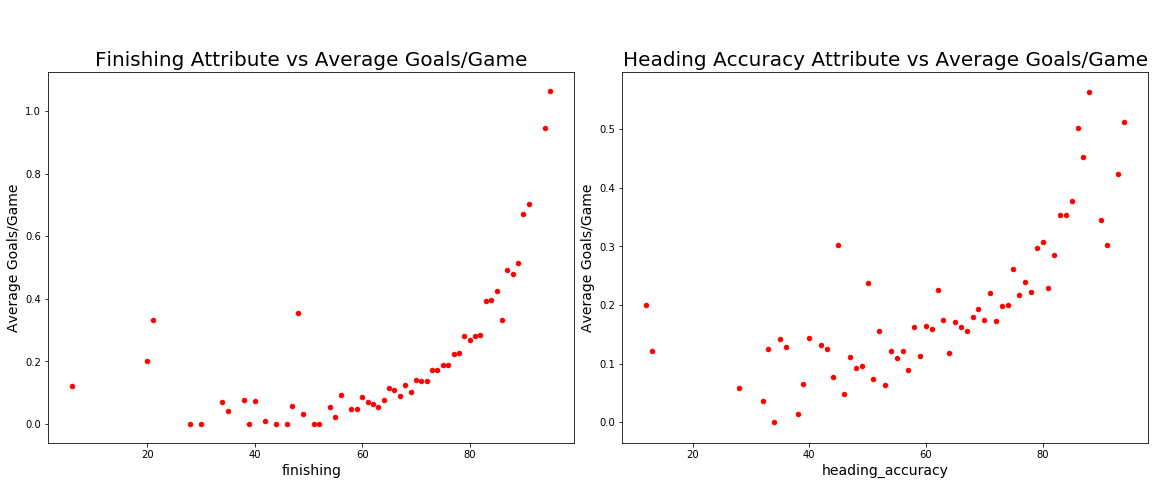

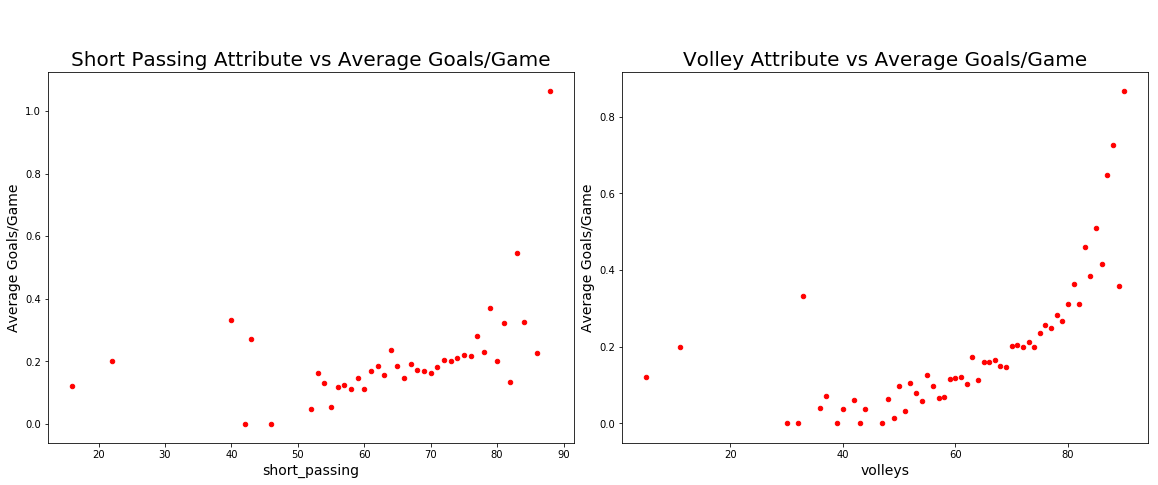

In [316]:
axis_size=14
color = ['r']

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)

ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'Shooting Attribute vs Average Goals/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Goals/Game',size=axis_size)
ax0.set_xlabel('Shooting Attributes',size=axis_size)
shooting.plot(ax=ax0,kind='scatter',x='sho',y='Average Goals/Game',color=color)

ax1 = plt.subplot(gs[0,2:4],title='\n \n'+ 'Crossing Attribute vs Average Goals/Game')
ax1.title.set_fontsize(20)
ax1.set_ylabel('Average Goals/Game',size=axis_size)
ax1.set_xlabel('Crossing Attribute',size=axis_size)
crossing.plot(ax=ax1,kind='scatter',x='crossing',y='Average Goals/Game',color=color)

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)

ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'Finishing Attribute vs Average Goals/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Goals/Game',size=axis_size)
ax0.set_xlabel('Finishing Attribute',size=axis_size)
finishing.plot(ax=ax0,kind='scatter',x='finishing',y='Average Goals/Game',color=color)

ax1 = plt.subplot(gs[0,2:4],title='\n \n'+ 'Heading Accuracy Attribute vs Average Goals/Game')
ax1.title.set_fontsize(20)
ax1.set_ylabel('Average Goals/Game',size=axis_size)
ax1.set_xlabel('Heading Accuracy Attribute',size=axis_size)
heading_accuracy.plot(ax=ax1,kind='scatter',x='heading_accuracy',y='Average Goals/Game',color=color)

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)

ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'Short Passing Attribute vs Average Goals/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Goals/Game',size=axis_size)
ax0.set_xlabel('Short Passing Attribute',size=axis_size)
short_passing.plot(ax=ax0,kind='scatter',x='short_passing',y='Average Goals/Game',color=color)

ax1 = plt.subplot(gs[0,2:4],title='\n \n'+ 'Volley Attribute vs Average Goals/Game')
ax1.title.set_fontsize(20)
ax1.set_ylabel('Average Goals/Game',size=axis_size)
ax1.set_xlabel('Volleys Attribute',size=axis_size)
volleys.plot(ax=ax1,kind='scatter',x='volleys',y='Average Goals/Game',color=color)

### Focus: Midfielders, Fowards & Assisting

In [317]:
RQ3_2 = pd.read_csv(('../../data/analysis/RQ3_2.csv'))
RQ3_2 = RQ3_2.drop('Unnamed: 0', 1)
RQ3_2 = RQ3_2.iloc[1:]

In [318]:
RQ3_2.head(5)

,Players,club,league,overall,age,Position,pas,crossing,vision,short_passing,long_passing,dribbling,Total Apps,Total Assists,Average Assists/Game
1,Aaron Lennon,Everton,English Premier League,77,30,Midfielder,71,78,73,76,54,82,120.0,15.0,0.125000
2,Aaron Niguez,Real Oviedo,Spanish Segunda Division,73,28,Midfielder,68,72,67,68,60,77,43.0,2.0,0.046512
3,Aaron Ramsey,Arsenal,English Premier League,82,26,Midfielder,79,75,80,84,80,81,142.0,26.0,0.183099
4,Abdoul Camara,En Avant de Guingamp,French Ligue 1,71,27,Midfielder,65,68,67,66,63,75,42.0,1.0,0.023810
5,Abdoul Sissoko,Akhisar Belediyespor,Turkish Super Lig,70,27,Midfielder,66,69,64,69,67,54,48.0,0.0,0.000000


In [319]:
passing = RQ3_2.groupby(['pas']).mean()['Average Assists/Game']
crossing = RQ3_2.groupby(['crossing']).mean()['Average Assists/Game']
vision = RQ3_2.groupby(['vision']).mean()['Average Assists/Game']
short_passing = RQ3_2.groupby(['short_passing']).mean()['Average Assists/Game']
long_passing = RQ3_2.groupby(['long_passing']).mean()['Average Assists/Game']
dribbling = RQ3_2.groupby(['dribbling']).mean()['Average Assists/Game']

In [320]:
passing_corr = passing.corr(RQ3_2['Average Assists/Game']).round(5).astype(str) 
crossing_corr = crossing.corr(RQ3_2['Average Assists/Game']).round(5).astype(str) 
vision_corr = vision.corr(RQ3_2['Average Assists/Game']).round(5).astype(str) 
short_passing_corr = short_passing.corr(RQ3_2['Average Assists/Game']).round(5).astype(str) 
long_passing_corr = long_passing.corr(RQ3_2['Average Assists/Game']).round(5).astype(str) 
dribbling_corr = dribbling.corr(RQ3_2['Average Assists/Game']).round(5).astype(str) 

In [321]:
ass_attributes = pd.DataFrame(columns = ['passing','crossing','vision','short_passing','long_passing','dribbling'])
ass_attributes.set_value('Average Assists/Game','passing', passing_corr)
ass_attributes.set_value('Average Assists/Game','crossing',crossing_corr)
ass_attributes.set_value('Average Assists/Game','vision',vision_corr)
ass_attributes.set_value('Average Assists/Game','short_passing',short_passing_corr)
ass_attributes.set_value('Average Assists/Game','long_passing',long_passing_corr)
ass_attributes.set_value('Average Assists/Game','dribbling',dribbling_corr)

,passing,crossing,vision,short_passing,long_passing,dribbling
Average Assists/Game,0.15616,0.0883,0.07885,0.02632,0.04026,0.02674


In [322]:
passing = passing.to_frame().reset_index()
crossing = crossing.to_frame().reset_index()
vision = vision.to_frame().reset_index()
short_passing = short_passing.to_frame().reset_index()
long_passing = long_passing.to_frame().reset_index()
dribbling = dribbling.to_frame().reset_index()

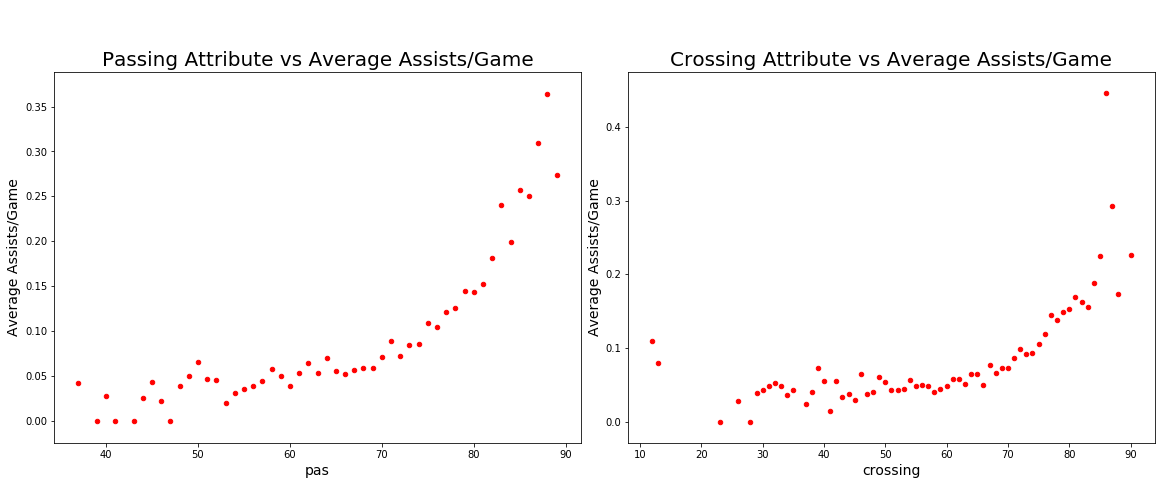

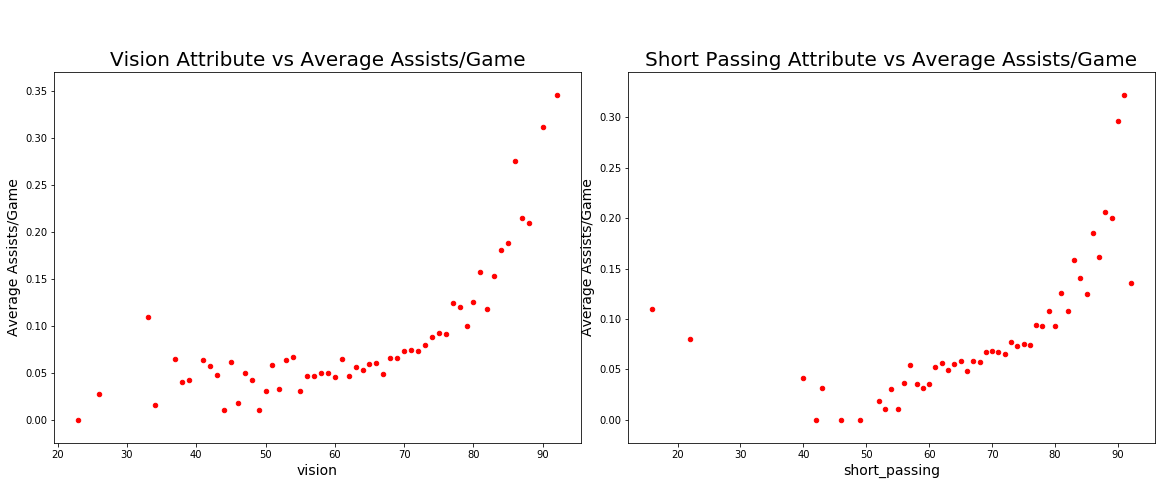

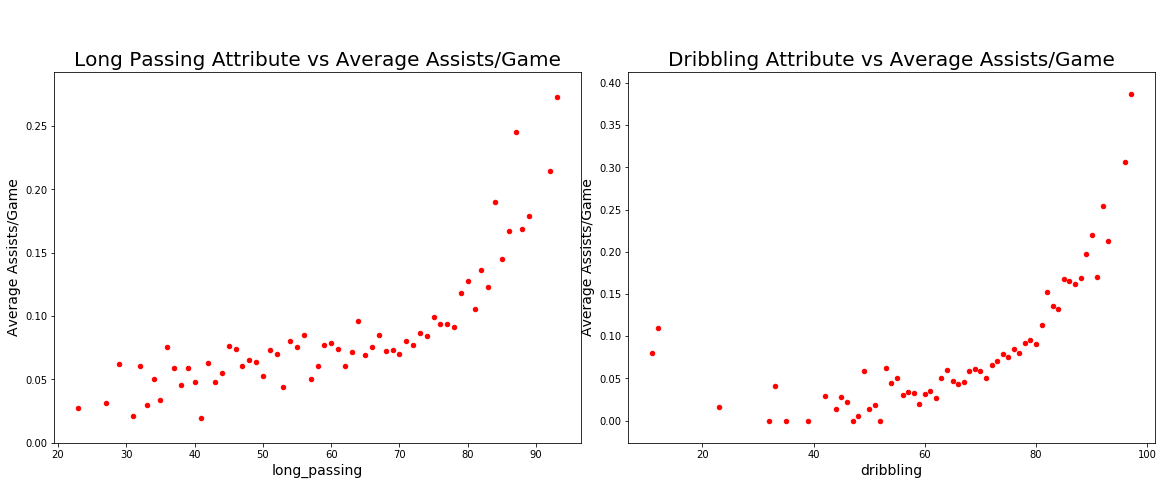

In [323]:
axis_size=14
color = ['r']

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)

ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'Passing Attribute vs Average Assists/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Assists/Game',size=axis_size)
ax0.set_xlabel('Passing Attribute',size=axis_size)
passing.plot(ax=ax0,x='pas',y='Average Assists/Game',kind='scatter',color=color)

ax1 = plt.subplot(gs[0,2:4],title='\n \n'+ 'Crossing Attribute vs Average Assists/Game')
ax1.title.set_fontsize(20)
ax1.set_ylabel('Average Assists/Game',size=axis_size)
ax1.set_xlabel('Crossing Attribute',size=axis_size)
crossing.plot(ax=ax1,x='crossing',y='Average Assists/Game',kind='scatter',color=color)

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)

ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'Vision Attribute vs Average Assists/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Assists/Game',size=axis_size)
ax0.set_xlabel('Vision Attribute',size=axis_size)
vision.plot(ax=ax0,x='vision',y='Average Assists/Game',kind='scatter',color=color)

ax1 = plt.subplot(gs[0,2:4],title='\n \n'+ 'Short Passing Attribute vs Average Assists/Game')
ax1.title.set_fontsize(20)
ax1.set_ylabel('Average Assists/Game',size=axis_size)
ax1.set_xlabel('Short Passing Attribute',size=axis_size)
short_passing.plot(ax=ax1,x='short_passing',y='Average Assists/Game',kind='scatter',color=color)

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)

ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'Long Passing Attribute vs Average Assists/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Assists/Game',size=axis_size)
ax0.set_xlabel('Long Passing Attribute',size=axis_size)
long_passing.plot(ax=ax0,x='long_passing',y='Average Assists/Game',kind='scatter',color=color)

ax1 = plt.subplot(gs[0,2:4],title='\n \n'+ 'Dribbling Attribute vs Average Assists/Game')
ax1.title.set_fontsize(20)
ax1.set_ylabel('Average Assists/Game',size=axis_size)
ax1.set_xlabel('Dribbling Attribute',size=axis_size)
dribbling.plot(ax=ax1,x='dribbling',y='Average Assists/Game',kind='scatter',color=color)


### Focus: Goalkeepers & Goalkeeping

In [324]:
RQ3_3 = pd.read_csv(('../../data/analysis/RQ3_3.csv'))
RQ3_3 = RQ3_3.drop('Unnamed: 0', 1)
RQ3_3 = RQ3_3.iloc[1:]

In [325]:
RQ3_3.head(5)

,Players,club,league,overall,age,Position,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Goalkeeping Attributes,Total Apps,Total Clean Sheets,Average Clean Sheets/Game
1,Alban Lafont,Toulouse FC,French Ligue 1,77,18,Goalkeeper,78,77,71,76,79,76.2,60.0,18.0,0.300000
2,Albano Bizzarri,Udinese,Italian Serie A,75,39,Goalkeeper,74,76,67,79,72,73.6,97.0,28.0,0.288660
3,Alex Cordaz,Crotone,Italian Serie A,72,34,Goalkeeper,68,70,62,72,74,69.2,37.0,4.0,0.108108
4,Alex McCarthy,Southampton,English Premier League,75,27,Goalkeeper,76,73,61,74,78,72.4,23.0,2.0,0.086957
5,Alexander Schwolow,SC Freiburg,German Bundesliga,75,25,Goalkeeper,75,74,71,69,77,73.2,36.0,6.0,0.166667


In [326]:
gk_diving = RQ3_3.groupby(['gk_diving']).mean()['Average Clean Sheets/Game']
gk_handling = RQ3_3.groupby(['gk_handling']).mean()['Average Clean Sheets/Game']
gk_kicking = RQ3_3.groupby(['gk_kicking']).mean()['Average Clean Sheets/Game']
gk_positioning = RQ3_3.groupby(['gk_positioning']).mean()['Average Clean Sheets/Game']
gk_reflexes = RQ3_3.groupby(['gk_reflexes']).mean()['Average Clean Sheets/Game']

In [327]:
gk_handling_corr = gk_handling.corr(RQ3_3['Average Clean Sheets/Game']).round(5).astype(str)
gk_kicking_corr = gk_kicking.corr(RQ3_3['Average Clean Sheets/Game']).round(5).astype(str)
gk_positioning_corr = gk_positioning.corr(RQ3_3['Average Clean Sheets/Game']).round(5).astype(str)
gk_reflexes_corr = gk_reflexes.corr(RQ3_3['Average Clean Sheets/Game']).round(5).astype(str)
gk_diving_corr = gk_diving.corr(RQ3_3['Average Clean Sheets/Game']).round(5).astype(str)

In [328]:
gk_attributes = pd.DataFrame(columns = ['gk_handling','gk_kicking','gk_positioning','gk_reflexes','gk_diving'])
gk_attributes.set_value('Average Clean Sheets/Game','gk_handling', gk_handling_corr)
gk_attributes.set_value('Average Clean Sheets/Game','gk_kicking',gk_kicking_corr)
gk_attributes.set_value('Average Clean Sheets/Game','gk_positioning',gk_positioning_corr)
gk_attributes.set_value('Average Clean Sheets/Game','gk_reflexes',gk_reflexes_corr)
gk_attributes.set_value('Average Clean Sheets/Game','gk_diving',gk_diving_corr)

,gk_handling,gk_kicking,gk_positioning,gk_reflexes,gk_diving
Average Clean Sheets/Game,0.01524,-0.05605,-0.16436,0.02954,-0.05608


In [329]:
gk_diving = gk_diving.to_frame().reset_index()
gk_handling = gk_handling.to_frame().reset_index()
gk_kicking = gk_kicking.to_frame().reset_index()
gk_positioning = gk_positioning.to_frame().reset_index()
gk_reflexes = gk_reflexes.to_frame().reset_index()

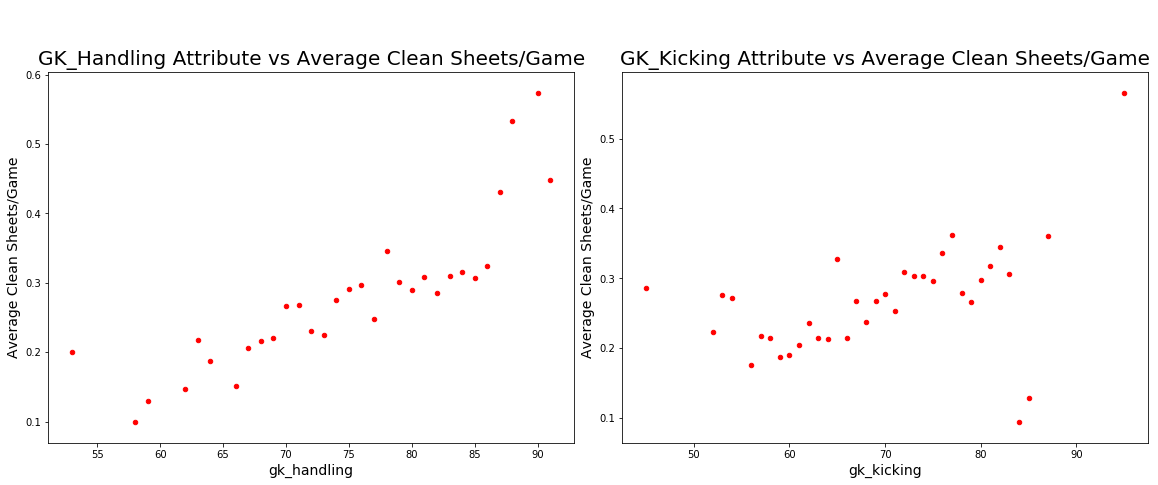

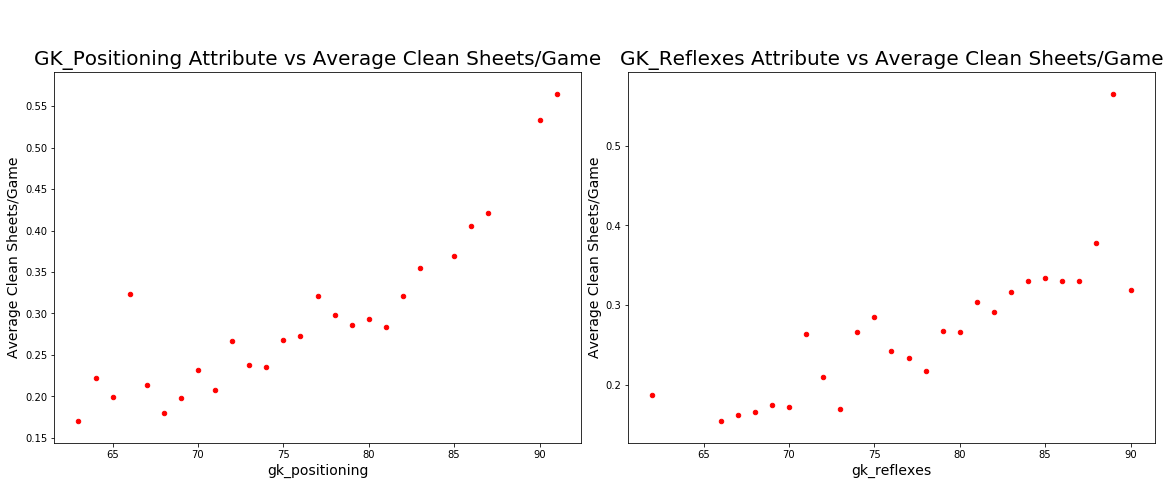

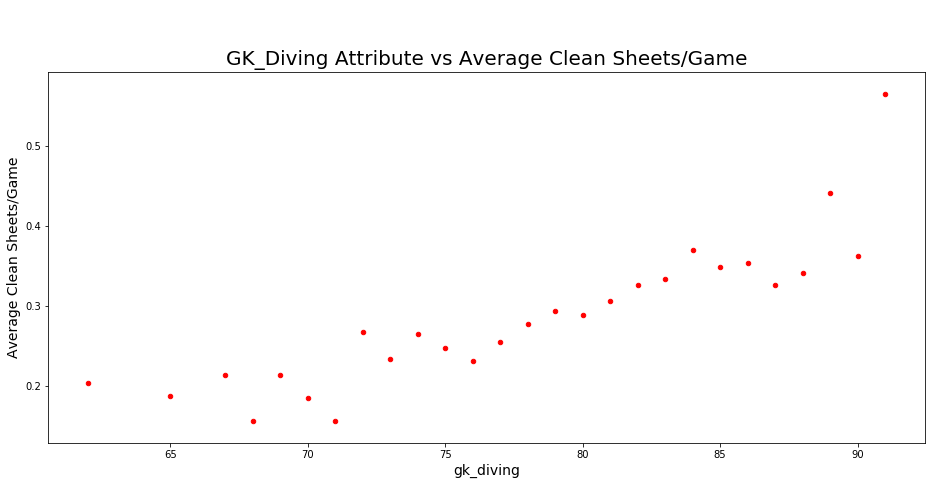

In [330]:
axis_size=14
color = ['r']

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)

ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'GK_Handling Attribute vs Average Clean Sheets/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Clean Sheets/Game',size=axis_size)
ax0.set_xlabel('GK_Handling Attribute',size=axis_size)
gk_handling.plot(ax=ax0, x='gk_handling',y='Average Clean Sheets/Game',kind='scatter',color=color)

ax1 = plt.subplot(gs[0,2:4],title='\n \n'+ 'GK_Kicking Attribute vs Average Clean Sheets/Game')
ax1.title.set_fontsize(20)
ax1.set_ylabel('Average Clean Sheets/Game',size=axis_size)
ax1.set_xlabel('GK_Kicking Attribute',size=axis_size)
gk_kicking.plot(ax=ax1, x='gk_kicking',y='Average Clean Sheets/Game',kind='scatter',color=color)

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)

ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'GK_Positioning Attribute vs Average Clean Sheets/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Clean Sheets/Game',size=axis_size)
ax0.set_xlabel('GK_Positioning Attribute',size=axis_size)
gk_positioning.plot(ax=ax0, x='gk_positioning',y='Average Clean Sheets/Game',kind='scatter',color=color)

ax1 = plt.subplot(gs[0,2:4],title='\n \n'+ 'GK_Reflexes Attribute vs Average Clean Sheets/Game')
ax1.title.set_fontsize(20)
ax1.set_ylabel('Average Clean Sheets/Game',size=axis_size)
ax1.set_xlabel('GK_Reflexes Attribute',size=axis_size)
gk_reflexes.plot(ax=ax1, x='gk_reflexes',y='Average Clean Sheets/Game',kind='scatter',color=color)

fig = plt.figure(figsize=(50,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'GK_Diving Attribute vs Average Clean Sheets/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Clean Sheets/Game',size=axis_size)
ax0.set_xlabel('GK_Diving Attribute ',size=axis_size)
gk_diving.plot(ax=ax0, x='gk_diving',y='Average Clean Sheets/Game',kind='scatter',color=color)


### Focus: Defender Attributes vs Defending

In [331]:
RQ3_4 = pd.read_csv(('../../data/analysis/RQ3_4.csv'))
RQ3_4 = RQ3_4.drop('Unnamed: 0', 1)
RQ3_4 = RQ3_4.iloc[1:]

In [332]:
RQ3_4.head(5)

,Players,club,league,overall,age,Position,def,marking,standing_tackle,sliding_tackle,work_rate_def,Total Apps,Total Cards,Average Clean Sheets/Game
1,Aaron Hughes,Heart of Midlothian,Scottish Premiership,71,37,Defender,72,75,73,71,Medium,37.0,3.0,0.162162
2,Adam Bodzek,Fortuna Dusseldorf,German 2. Bundesliga,69,31,Defender,69,64,74,70,High,29.0,9.0,0.241379
3,Adam Lang,Dijon FCO,French Ligue 1,69,24,Defender,71,72,71,67,Medium,19.0,4.0,0.315789
4,Adam Masina,Bologna,Italian Serie A,74,23,Defender,71,66,74,74,Medium,65.0,16.0,0.276923
5,Adam Nagy,Bologna,Italian Serie A,74,22,Defender,68,68,72,64,High,25.0,4.0,0.240000


In [333]:
defending = RQ3_4.groupby(['def']).mean()['Average Clean Sheets/Game']
marking = RQ3_4.groupby(['marking']).mean()['Average Clean Sheets/Game']
standing_tackle = RQ3_4.groupby(['standing_tackle']).mean()['Average Clean Sheets/Game']
sliding_tackle = RQ3_4.groupby(['sliding_tackle']).mean()['Average Clean Sheets/Game']

In [334]:
defending_corr = defending.corr(RQ3_4['Average Clean Sheets/Game']).round(5).astype(str)
marking_corr = marking.corr(RQ3_4['Average Clean Sheets/Game']).round(5).astype(str)
standing_tackle_corr = standing_tackle.corr(RQ3_4['Average Clean Sheets/Game']).round(5).astype(str)
sliding_tackle_corr = sliding_tackle.corr(RQ3_4['Average Clean Sheets/Game']).round(5).astype(str)

In [335]:
def_attributes = pd.DataFrame(columns = ['defending','marking','standing_tackle','sliding_tackle'])
def_attributes.set_value('Average Clean Sheets/Game','defending', defending_corr)
def_attributes.set_value('Average Clean Sheets/Game','marking',marking_corr)
def_attributes.set_value('Average Clean Sheets/Game','standing_tackle',standing_tackle_corr)
def_attributes.set_value('Average Clean Sheets/Game','sliding_tackle',sliding_tackle_corr)

,defending,marking,standing_tackle,sliding_tackle
Average Clean Sheets/Game,0.22197,0.21127,-0.04072,0.18312


In [336]:
defending = defending.to_frame().reset_index()
marking = marking.to_frame().reset_index()
standing_tackle = standing_tackle.to_frame().reset_index()
sliding_tackle = sliding_tackle.to_frame().reset_index()

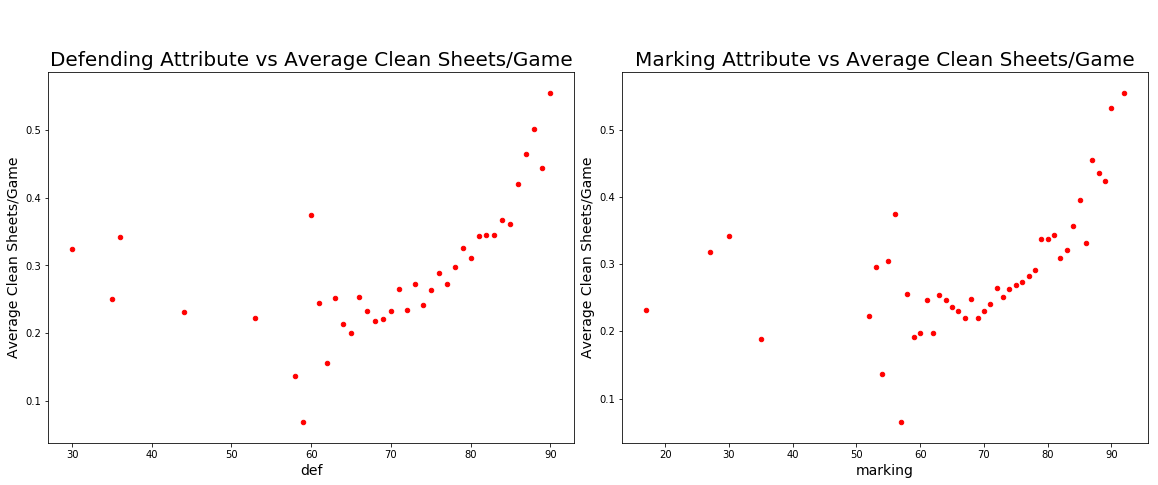

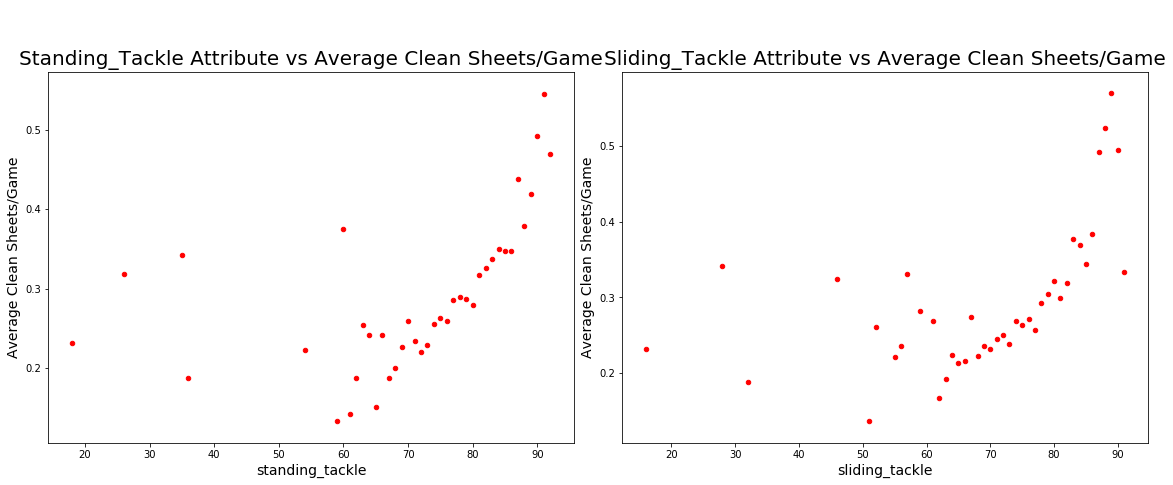

In [338]:
axis_size=14
color = ['r']

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)

ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'Defending Attribute vs Average Clean Sheets/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Clean Sheets/Game',size=axis_size)
ax0.set_xlabel('Defending Attribute',size=axis_size)
defending.plot(ax=ax0, x='def',y='Average Clean Sheets/Game',kind='scatter',color=color)

ax1 = plt.subplot(gs[0,2:4],title='\n \n'+ 'Marking Attribute vs Average Clean Sheets/Game')
ax1.title.set_fontsize(20)
ax1.set_ylabel('Average Clean Sheets/Game',size=axis_size)
ax1.set_xlabel('Marking Attribute',size=axis_size)
marking.plot(ax=ax1, x='marking',y='Average Clean Sheets/Game',kind='scatter',color=color)

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)

ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'Standing_Tackle Attribute vs Average Clean Sheets/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Clean Sheets/Game',size=axis_size)
ax0.set_xlabel('Standing_Tackle Attribute',size=axis_size)
standing_tackle.plot(ax=ax0, x='standing_tackle',y='Average Clean Sheets/Game',kind='scatter',color=color)

ax1 = plt.subplot(gs[0,2:4],title='\n \n'+ 'Sliding_Tackle Attribute vs Average Clean Sheets/Game')
ax1.title.set_fontsize(20)
ax1.set_ylabel('Average Clean Sheets/Game',size=axis_size)
ax1.set_xlabel('Sliding_Tackle Attribute',size=axis_size)
sliding_tackle.plot(ax=ax1, x='sliding_tackle',y='Average Clean Sheets/Game',kind='scatter',color=color)

### Mental Attributes (eg. Agression) vs Cards/Game

In [ ]:
RQ3_5 = pd.read_csv(('../../data/analysis/RQ3_5.csv'))
RQ3_5 = RQ3_5 .drop('Unnamed: 0', 1)
RQ3_5 = RQ3_5 .iloc[1:]

In [ ]:
RQ3_5.head(5)

In [ ]:
aggression = RQ3_5.groupby(['aggression']).mean()['Average Cards/Game']

In [ ]:
aggression.corr(RQ3_5['Average Cards/Game']).round(5).astype(str)

In [ ]:
aggression = aggression.to_frame().reset_index()

In [ ]:
axis_size=14
fig = plt.figure(figsize=(30,15))

gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'Aggression Attribute vs Average Cards/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Cards/Game',size=axis_size)
ax0.set_xlabel('Average Cards/Game',size=axis_size)
aggression.plot(ax=ax0,x='aggression',y='Average Cards/Game',kind='scatter',color='r')